<a href="https://colab.research.google.com/github/prashanth-ds-ml/Competitions/blob/main/Loan_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction

Loading all the required libraries to read,clean,analysis,visualise the dataset 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_loan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_income_log'] = np.log(df['Total_income'])
df['LoanAmount_log'] = np.log(df['LoanAmount'])

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_income          0
Total_income_log      0
LoanAmount_log       22
dtype: int64

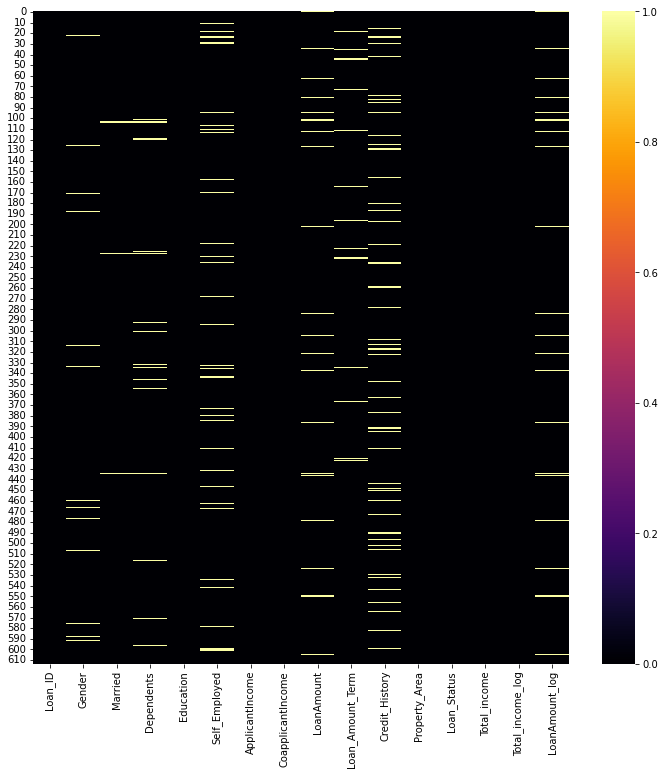

In [8]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.isnull(), cmap='inferno')
plt.show()

In [9]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)

In [10]:
mean_la = df['LoanAmount'].mean()
mean_la_log = df['LoanAmount_log'].mean()

df['LoanAmount'].fillna(value = mean_la, inplace = True)
df['LoanAmount_log'].fillna(value = mean_la_log, inplace = True)


In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_income         0
Total_income_log     0
LoanAmount_log       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_income       614 non-null    float64
 14  Total_income_log   614 non-null    float64
 15  LoanAmount_log     614 non-null    float64
dtypes: float64(7), int64(1), o

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Total_income_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.857444
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760


In [14]:
from sklearn.preprocessing import OneHotEncoder

df['Gender']=df['Gender'].astype('category')
df['gender']=df['Gender'].cat.codes
df['Married']=df['Married'].astype('category')
df['married']=df['Married'].cat.codes
df['Education']=df['Education'].astype('category')
df['education']=df['Education'].cat.codes
df['Self_Employed']=df['Self_Employed'].astype('category')
df['self_employed']=df['Self_Employed'].cat.codes
df['Loan_Status']=df['Loan_Status'].astype('category')
df['loan_status']=df['Loan_Status'].cat.codes
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,Total_income,Total_income_log,LoanAmount_log,gender,married,education,self_employed,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,Urban,Y,5849.0,8.674026,4.857444,1,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,Rural,N,6091.0,8.714568,4.852030,1,1,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,Urban,Y,3000.0,8.006368,4.189655,1,1,0,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,Urban,Y,4941.0,8.505323,4.787492,1,1,1,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,Urban,Y,6000.0,8.699515,4.948760,1,0,0,0,1


In [15]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
df['Dependents'] = df['Dependents'].replace(to_replace = '3+',value = '4')

In [17]:
df['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [18]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [19]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_res = lb.fit_transform(df['Property_Area'])
df_1 = pd.DataFrame(lb_res,columns = lb.classes_)


In [20]:
df_1.head()

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
df = pd.concat([df,df_1],axis = 1)

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Total_income_log,LoanAmount_log,gender,married,education,self_employed,loan_status,Rural,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,8.674026,4.857444,1,0,0,0,1,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,8.714568,4.852030,1,1,0,0,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,8.006368,4.189655,1,1,0,1,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,8.505323,4.787492,1,1,1,0,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,8.699515,4.948760,1,0,0,0,1,0,0,1


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Dependents']= le.fit_transform(df['Dependents'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         614 non-null    int64   
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         614 non-null    float64 
 9   Loan_Amount_Term   614 non-null    float64 
 10  Credit_History     614 non-null    float64 
 11  Property_Area      614 non-null    object  
 12  Loan_Status        614 non-null    category
 13  Total_income       614 non-null    float64 
 14  Total_income_log   614 non-null    float64 
 15  LoanAmount_log     614 non-null    float64 
 16  gender  

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Total_income_log,LoanAmount_log,gender,married,education,self_employed,loan_status,Rural,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,8.674026,4.857444,1,0,0,0,1,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,8.714568,4.852030,1,1,0,0,0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,8.006368,4.189655,1,1,0,1,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,8.505323,4.787492,1,1,1,0,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,8.699515,4.948760,1,0,0,0,1,0,0,1


In [26]:
df = df.drop(columns=['Loan_ID','Gender','Married','Education','Self_Employed','Loan_Status','Property_Area'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    int64  
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Total_income       614 non-null    float64
 7   Total_income_log   614 non-null    float64
 8   LoanAmount_log     614 non-null    float64
 9   gender             614 non-null    int8   
 10  married            614 non-null    int8   
 11  education          614 non-null    int8   
 12  self_employed      614 non-null    int8   
 13  loan_status        614 non-null    int8   
 14  Rural              614 non-null    int64  
 15  Semiurban          614 non-null    int64  
 16  Urban              614 non

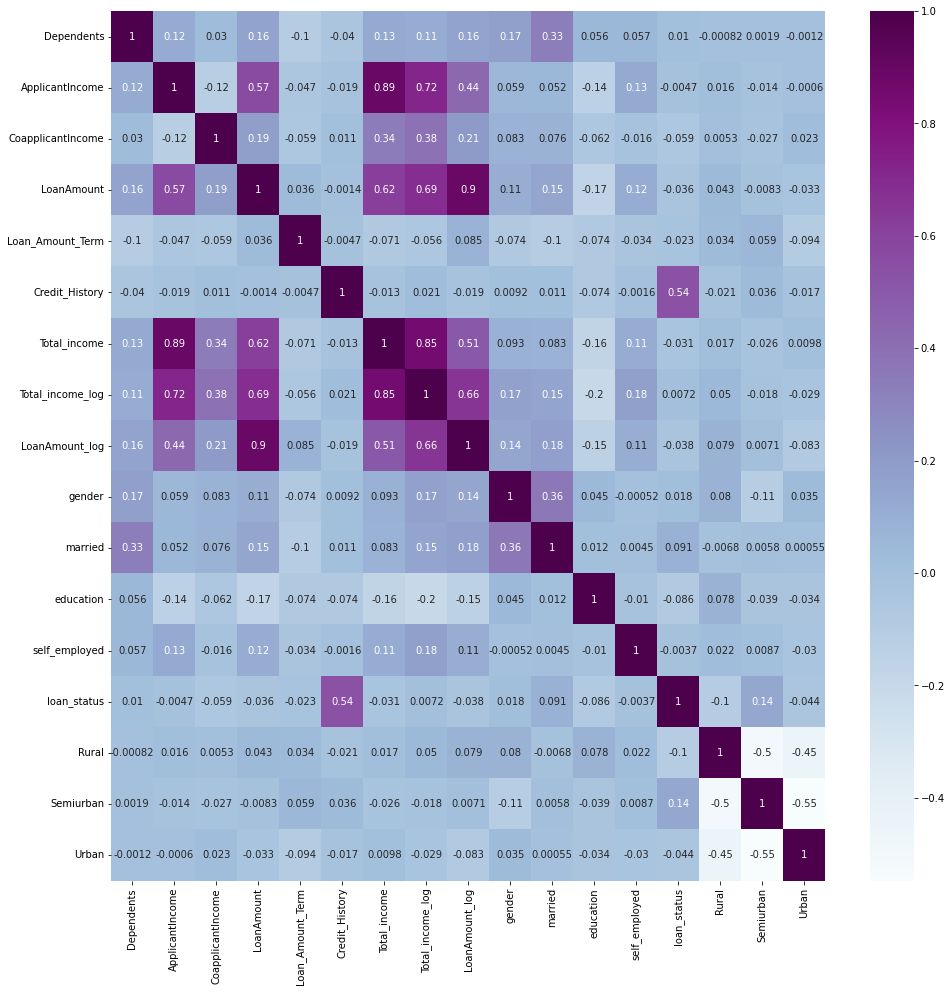

In [28]:
df.corr()
plt.figure(figsize=(16,16))
plot = sb.heatmap(df.corr(),cmap='BuPu',annot = True)
plt.show()

In [29]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Total_income_log,LoanAmount_log,gender,married,education,self_employed,loan_status,Rural,Semiurban,Urban
0,0,5849,0.0,146.412162,360.0,1.0,5849.0,8.674026,4.857444,1,0,0,0,1,0,0,1
1,1,4583,1508.0,128.000000,360.0,1.0,6091.0,8.714568,4.852030,1,1,0,0,0,1,0,0
2,0,3000,0.0,66.000000,360.0,1.0,3000.0,8.006368,4.189655,1,1,0,1,1,0,0,1
3,0,2583,2358.0,120.000000,360.0,1.0,4941.0,8.505323,4.787492,1,1,1,0,1,0,0,1
4,0,6000,0.0,141.000000,360.0,1.0,6000.0,8.699515,4.948760,1,0,0,0,1,0,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    int64  
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Total_income       614 non-null    float64
 7   Total_income_log   614 non-null    float64
 8   LoanAmount_log     614 non-null    float64
 9   gender             614 non-null    int8   
 10  married            614 non-null    int8   
 11  education          614 non-null    int8   
 12  self_employed      614 non-null    int8   
 13  loan_status        614 non-null    int8   
 14  Rural              614 non-null    int64  
 15  Semiurban          614 non-null    int64  
 16  Urban              614 non

In [82]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income','Total_income_log','LoanAmount_log','Dependents']

In [83]:
from sklearn.preprocessing import StandardScaler

func = StandardScaler()
df[cols] = func.fit_transform(df[cols])

In [84]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Total_income_log,LoanAmount_log,gender,married,education,self_employed,Rural,Semiurban,Urban,loan_status
0,-0.737806,0.072991,-0.554487,-5.786179e-18,0.273231,1.0,-0.182184,0.008468,-2.054093e-16,1,0,0,0,0,0,1,1
1,0.253470,-0.134412,-0.038732,-2.192733e-01,0.273231,1.0,-0.144684,0.082903,-1.092417e-02,1,1,0,0,1,0,0,0
2,-0.737806,-0.393747,-0.554487,-9.576410e-01,0.273231,1.0,-0.623656,-1.217363,-1.347462e+00,1,1,0,1,0,0,1,1
3,-0.737806,-0.462062,0.251980,-3.145466e-01,0.273231,1.0,-0.322885,-0.301273,-1.411496e-01,1,1,1,0,0,0,1,1
4,-0.737806,0.097728,-0.554487,-6.445428e-02,0.273231,1.0,-0.158785,0.055266,1.842563e-01,1,0,0,0,0,0,1,1


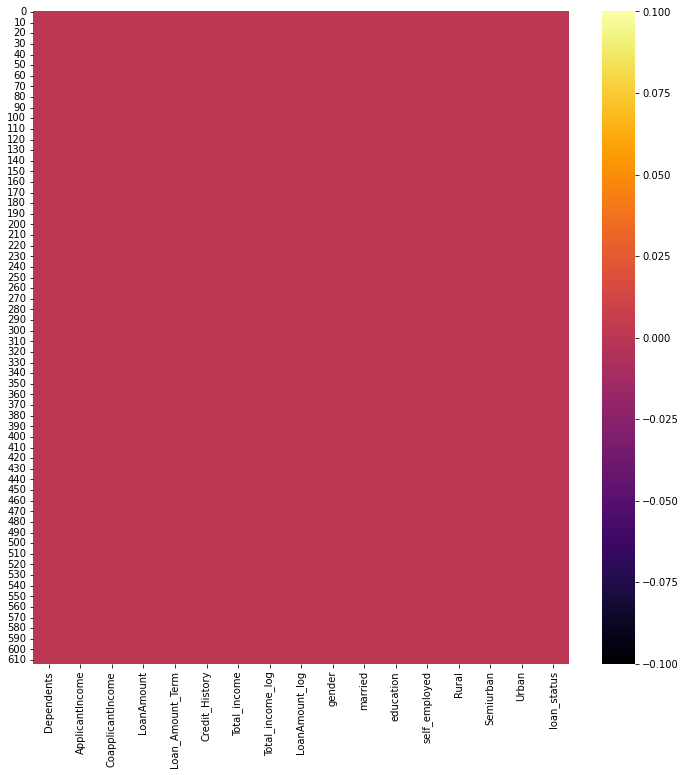

In [85]:
plt.figure(figsize=(12, 12))
sb.heatmap(df.isnull(), cmap='inferno')
plt.show()

In [86]:
column = df.pop('loan_status')

In [87]:
df.insert(16, 'loan_status', column)

In [39]:
'''sb.pairplot(df,diag_kind = 'kde',hue = 'loan_status',height = 2)
plt.show()'''

"sb.pairplot(df,diag_kind = 'kde',hue = 'loan_status',height = 2)\nplt.show()"

In [88]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Total_income_log,LoanAmount_log,gender,married,education,self_employed,Rural,Semiurban,Urban,loan_status
0,-0.737806,0.072991,-0.554487,-5.786179e-18,0.273231,1.0,-0.182184,0.008468,-2.054093e-16,1,0,0,0,0,0,1,1
1,0.253470,-0.134412,-0.038732,-2.192733e-01,0.273231,1.0,-0.144684,0.082903,-1.092417e-02,1,1,0,0,1,0,0,0
2,-0.737806,-0.393747,-0.554487,-9.576410e-01,0.273231,1.0,-0.623656,-1.217363,-1.347462e+00,1,1,0,1,0,0,1,1
3,-0.737806,-0.462062,0.251980,-3.145466e-01,0.273231,1.0,-0.322885,-0.301273,-1.411496e-01,1,1,1,0,0,0,1,1
4,-0.737806,0.097728,-0.554487,-6.445428e-02,0.273231,1.0,-0.158785,0.055266,1.842563e-01,1,0,0,0,0,0,1,1


In [89]:
x = df.iloc[0:,:16]
x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Total_income_log,LoanAmount_log,gender,married,education,self_employed,Rural,Semiurban,Urban
0,-0.737806,0.072991,-0.554487,-5.786179e-18,0.273231,1.0,-0.182184,0.008468,-2.054093e-16,1,0,0,0,0,0,1
1,0.253470,-0.134412,-0.038732,-2.192733e-01,0.273231,1.0,-0.144684,0.082903,-1.092417e-02,1,1,0,0,1,0,0
2,-0.737806,-0.393747,-0.554487,-9.576410e-01,0.273231,1.0,-0.623656,-1.217363,-1.347462e+00,1,1,0,1,0,0,1
3,-0.737806,-0.462062,0.251980,-3.145466e-01,0.273231,1.0,-0.322885,-0.301273,-1.411496e-01,1,1,1,0,0,0,1
4,-0.737806,0.097728,-0.554487,-6.445428e-02,0.273231,1.0,-0.158785,0.055266,1.842563e-01,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.737806,-0.410130,-0.554487,-8.980952e-01,0.273231,1.0,-0.639152,-1.279607,-1.200112e+00,0,0,0,0,1,0,0
610,2.236021,-0.212557,-0.554487,-1.267279e+00,-2.522836,1.0,-0.452274,-0.641153,-2.357923e+00,1,1,0,0,1,0,0
611,0.253470,0.437174,-0.472404,1.269371e+00,0.273231,1.0,0.199475,0.653699,1.363919e+00,1,1,0,0,0,0,1
612,1.244745,0.357064,-0.554487,4.833669e-01,0.273231,1.0,0.086512,0.485168,7.539780e-01,1,1,0,0,0,0,1


In [90]:
y = df.iloc[0:,16]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: loan_status, Length: 614, dtype: int8

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state = 7)

In [92]:
print(f'shape of x_train : {x_train.shape}')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of x_test : {x_test.shape}')
print(f'shape of y_test : {y_test.shape}')

shape of x_train : (491, 16)
shape of y_train : (491,)
shape of x_test : (123, 16)
shape of y_test : (123,)


Feature selection: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]

Feature scores: [3.31109076e-01 1.60187584e-01 3.14739720e+00 1.86195342e+00
 1.41250350e-01 1.87818931e+02 1.44347482e+00 4.29504176e-01
 1.49595175e+00 3.57298914e-02 5.46295259e+00 4.27567810e+00
 1.84944266e-01 4.72522109e+00 9.98753728e+00 1.19661279e+00]

Selected features: ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_income', 'Total_income_log', 'LoanAmount_log', 'gender', 'married', 'education', 'self_employed', 'Rural', 'Semiurban', 'Urban']

Removed features: []



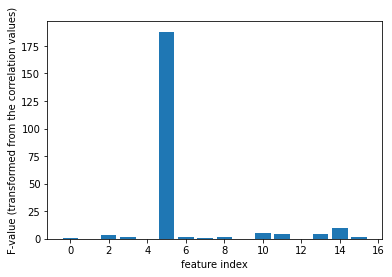

In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,chi2,f_classif

fes = SelectKBest(score_func=f_classif,k = 'all')
fes.fit(x_train,y_train)
x_train = fes.transform(x_train)
x_test = fes.transform(x_test)


print(f"Feature selection: {fes.get_support()}",end = '\n\n')
print(f"Feature scores: {fes.scores_}",end = '\n\n')
print(f"Selected features: {list(x.columns[fes.get_support()])}",end = '\n\n')
print(f"Removed features: {list(x.columns[~fes.get_support()])}",end = '\n\n')

plt.bar([i for i in range(len(fes.scores_))], fes.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [100]:

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import classification_report,f1_score
from sklearn.svm import SVC

In [101]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(penalty = 'l2',solver = 'lbfgs',max_iter=1000, multi_class= 'ovr',
                              random_state = 7,C = 3,tol = 0.0001)
log_model.fit(x_train,y_train)

LogisticRegression(C=3, max_iter=1000, multi_class='ovr', random_state=7)

In [152]:
spl = KFold(n_splits = 5)
model  = LogisticRegression()
result = cross_val_score(log_model,x,y,cv = spl)
cross_validation_score =  round(np.mean(result)*100,2)
print(f'Logistic regression cross validation score: {cross_validation_score}','\n')

log_model_predictions = log_model.predict(x_test)
print(f'Logistic model predictions: {log_model_predictions}','\n')

print("Accuracy of Logistic model is: ",accuracy_score(y_test,log_model_predictions))
print("Logistic model Classification report: ","\n",classification_report(y_test,log_model_predictions))
print("Confusion matrix for Logistic model:","\n",confusion_matrix(y_test,log_model_predictions))

Logistic regression cross validation score: 80.62 

Logistic model predictions: [0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1] 

Accuracy of Logistic model is:  0.8373983739837398
Logistic model Classification report:  
               precision    recall  f1-score   support

           0       0.91      0.54      0.68        39
           1       0.82      0.98      0.89        84

    accuracy                           0.84       123
   macro avg       0.87      0.76      0.78       123
weighted avg       0.85      0.84      0.82       123

Confusion matrix for Logistic model: 
 [[21 18]
 [ 2 82]]


In [143]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier()
ada_classifier.fit(x_train,y_train)

AdaBoostClassifier()

In [155]:
spl = KFold(n_splits = 5)
model  = LogisticRegression()
result = cross_val_score(ada_classifier,x,y,cv = spl)
cross_validation_score =  round(np.mean(result)*100,2)
print(f'AdaBoostClassifier cross validation score: {cross_validation_score}','\n')

ada_classifier_predictions = ada_classifier.predict(x_test)
print(f'AdaBoostClassifier model predictions: {ada_classifier_predictions}','\n')

print("Accuracy of AdaBoostClassifier model is: ",accuracy_score(y_test,ada_classifier_predictions))
print("AdaBoostClassifier model Classification report: ","\n",classification_report(y_test,ada_classifier_predictions))
print("Confusion matrix for AdaBoostClassifier model:","\n",confusion_matrix(y_test,ada_classifier_predictions))

AdaBoostClassifier cross validation score: 79.32 

AdaBoostClassifier model predictions: [0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1] 

Accuracy of AdaBoostClassifier model is:  0.8211382113821138
AdaBoostClassifier model Classification report:  
               precision    recall  f1-score   support

           0       0.84      0.54      0.66        39
           1       0.82      0.95      0.88        84

    accuracy                           0.82       123
   macro avg       0.83      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123

Confusion matrix for AdaBoostClassifier model: 
 [[21 18]
 [ 4 80]]


In [209]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_gb_classifier = HistGradientBoostingClassifier(learning_rate = 1,loss='binary_crossentropy',
                                                    l2_regularization= 0.008,max_leaf_nodes=50,
                                                    max_depth=9)
hist_gb_classifier.fit(x_train,y_train)

HistGradientBoostingClassifier(l2_regularization=0.008, learning_rate=1,
                               loss='binary_crossentropy', max_depth=9,
                               max_leaf_nodes=50)

In [210]:
spl = KFold(n_splits = 5)
model  = HistGradientBoostingClassifier()
result = cross_val_score(hist_gb_classifier,x,y,cv = spl)
cross_validation_score =  round(np.mean(result)*100,2)
print(f'HistGradientBoostingClassifier cross validation score: {cross_validation_score}','\n')

hist_gb_classifier_predictions = hist_gb_classifier.predict(x_test)
print(f'HistGradientBoostingClassifier model predictions: {hist_gb_classifier_predictions}','\n')

print("Accuracy of HistGradientBoostingClassifier model is: ",accuracy_score(y_test,hist_gb_classifier_predictions))
print("HistGradientBoostingClassifier model Classification report: ","\n",classification_report(y_test,hist_gb_classifier_predictions))
print("Confusion matrix for HistGradientBoostingClassifier model:","\n",confusion_matrix(y_test,hist_gb_classifier_predictions))

HistGradientBoostingClassifier cross validation score: 75.41 

HistGradientBoostingClassifier model predictions: [0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1] 

Accuracy of HistGradientBoostingClassifier model is:  0.7967479674796748
HistGradientBoostingClassifier model Classification report:  
               precision    recall  f1-score   support

           0       0.72      0.59      0.65        39
           1       0.82      0.89      0.86        84

    accuracy                           0.80       123
   macro avg       0.77      0.74      0.75       123
weighted avg       0.79      0.80      0.79       123

Confusion matrix for HistGradientBoostingClassifier model: 
 [[23 16]
 [ 9 75]]


In [105]:
 df_test = pd.read_csv('test_loan.csv')

In [106]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [107]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [108]:
df_test['Total_income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['Total_income_log'] = np.log(df_test['Total_income'])
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

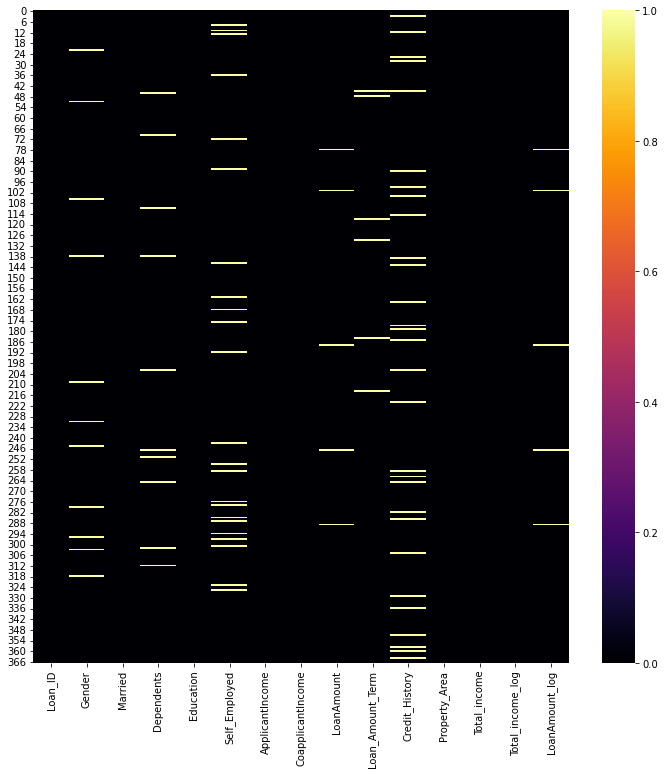

In [109]:
plt.figure(figsize=(12, 12))
sb.heatmap(df_test.isnull(), cmap='inferno')
plt.show()

In [110]:
df_test['Gender'].fillna(df_test['Gender'].mode()[0],inplace = True)
df_test['Married'].fillna(df_test['Married'].mode()[0],inplace = True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0],inplace = True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0],inplace = True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0],inplace = True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0],inplace = True)

In [111]:
mean_la = df_test['LoanAmount'].mean()
mean_la_log = df_test['LoanAmount_log'].mean()

df_test['LoanAmount'].fillna(value = mean_la, inplace = True)
df_test['LoanAmount_log'].fillna(value = mean_la_log, inplace = True)

In [112]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_income         0
Total_income_log     0
LoanAmount_log       0
dtype: int64

In [113]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Total_income       367 non-null    int64  
 13  Total_income_log   367 non-null    float64
 14  LoanAmount_log     367 non-null    float64
dtypes: float64(5), int64(3), object(7)
memory usage: 43.1+ KB


In [114]:
from sklearn.preprocessing import OneHotEncoder

df_test['Gender']=df_test['Gender'].astype('category')
df_test['gender']=df_test['Gender'].cat.codes
df_test['Married']=df_test['Married'].astype('category')
df_test['married']=df_test['Married'].cat.codes
df_test['Education']=df_test['Education'].astype('category')
df_test['education']=df_test['Education'].cat.codes
df_test['Self_Employed']=df_test['Self_Employed'].astype('category')
df_test['self_employed']=df_test['Self_Employed'].cat.codes

In [115]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,Total_income_log,LoanAmount_log,gender,married,education,self_employed
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724,4.700480,1,1,0,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581,4.836282,1,1,0,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678,5.337538,1,1,0,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,8.494129,4.605170,1,1,0,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378,4.356709,1,0,1,0


In [116]:
df_test.Dependents.value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [117]:
df_test['Dependents'] = df_test['Dependents'].replace(to_replace = '3+',value = '4')

In [118]:
df_test['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [119]:
df_test.Property_Area.value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [120]:
lb = LabelBinarizer()
lb_res = lb.fit_transform(df_test['Property_Area'])
df_2 = pd.DataFrame(lb_res,columns = lb.classes_)

In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_test['Dependents']= le.fit_transform(df_test['Dependents'])

In [122]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            367 non-null    object  
 1   Gender             367 non-null    category
 2   Married            367 non-null    category
 3   Dependents         367 non-null    int64   
 4   Education          367 non-null    category
 5   Self_Employed      367 non-null    category
 6   ApplicantIncome    367 non-null    int64   
 7   CoapplicantIncome  367 non-null    int64   
 8   LoanAmount         367 non-null    float64 
 9   Loan_Amount_Term   367 non-null    float64 
 10  Credit_History     367 non-null    float64 
 11  Property_Area      367 non-null    object  
 12  Total_income       367 non-null    int64   
 13  Total_income_log   367 non-null    float64 
 14  LoanAmount_log     367 non-null    float64 
 15  gender             367 non-null    int8    
 16  married 

In [123]:
df_test = pd.concat([df_test,df_2],axis = 1)

In [124]:
df_test = df_test.drop(columns=['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area'])

In [125]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         367 non-null    int64  
 1   ApplicantIncome    367 non-null    int64  
 2   CoapplicantIncome  367 non-null    int64  
 3   LoanAmount         367 non-null    float64
 4   Loan_Amount_Term   367 non-null    float64
 5   Credit_History     367 non-null    float64
 6   Total_income       367 non-null    int64  
 7   Total_income_log   367 non-null    float64
 8   LoanAmount_log     367 non-null    float64
 9   gender             367 non-null    int8   
 10  married            367 non-null    int8   
 11  education          367 non-null    int8   
 12  self_employed      367 non-null    int8   
 13  Rural              367 non-null    int64  
 14  Semiurban          367 non-null    int64  
 15  Urban              367 non-null    int64  
dtypes: float64(5), int64(7), i

In [126]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income','Total_income_log','LoanAmount_log','Dependents']

In [127]:
from sklearn.preprocessing import StandardScaler

func = StandardScaler()
df_test[cols] = func.fit_transform(df_test[cols])

In [128]:
df_test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Total_income_log,LoanAmount_log,gender,married,education,self_employed,Rural,Semiurban,Urban
0,-0.758222,0.186461,-0.673335,-0.429368,0.266022,1.0,-0.126182,0.072539,-0.304413,1,1,0,0,0,0,1
1,0.181871,-0.352692,-0.029848,-0.166482,0.266022,1.0,-0.346506,-0.397171,0.022330,1,1,0,0,0,0,1
2,1.121964,0.039641,0.098849,1.180807,0.266022,1.0,0.081817,0.436600,1.228369,1,1,0,0,0,0,1
3,1.121964,-0.502774,0.418877,-0.593671,0.266022,1.0,-0.286803,-0.259193,-0.533732,1,1,0,0,0,0,1
4,-0.758222,-0.311909,-0.673335,-0.955139,0.266022,1.0,-0.596875,-1.100655,-1.131538,1,0,1,0,0,0,1


In [129]:
log_model_test_predictions = log_model.predict(df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [130]:
log_model_test_predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [147]:
ada_classifier_test_predictions = ada_classifier.predict(df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [148]:
ada_classifier_test_predictions

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,

In [211]:
hist_gb_classifier_test_predictions = hist_gb_classifier.predict(df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but HistGradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [212]:
hist_gb_classifier_test_predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [131]:
submission= pd.read_csv("sample_submission_loan.csv")
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [132]:
submission.isnull().sum()

Loan_ID        0
Loan_Status    0
dtype: int64

In [133]:
submission.drop(['Loan_ID'], axis=1, inplace=True)
submission.head()

,Loan_Status
0,N
1,N
2,N
3,N
4,N


In [134]:
submission['Loan_Status']=submission['Loan_Status'].astype('category')
submission['loan_status']=submission['Loan_Status'].cat.codes

In [135]:
submission.head()

,Loan_Status,loan_status
0,N,0
1,N,0
2,N,0
3,N,0
4,N,0


In [136]:
submission.drop(['Loan_Status'], axis=1, inplace=True)
submission.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [149]:
print(f'Logistic regression Accuracy score: {accuracy_score(submission,log_model_test_predictions)}')

Logistic regression Accuracy score: 0.16621253405994552


In [150]:
print(f'AdaBoostClasifier Accuracy score: {accuracy_score(submission,ada_classifier_test_predictions)}')

AdaBoostClasifier Accuracy score: 0.23160762942779292


In [213]:
print(f'HistGradientBoostingClassifier Accuracy score: {accuracy_score(submission,hist_gb_classifier_test_predictions)}')

HistGradientBoostingClassifier Accuracy score: 0.2506811989100817


In [214]:
temp_1= pd.DataFrame(hist_gb_classifier_test_predictions, columns= ['Loan_Status'])

In [215]:
test_for_sub= pd.read_csv("test_loan.csv")
final_sub_hist_gb_classifier= pd.DataFrame()
final_sub_hist_gb_classifier['Loan_ID']= test_for_sub['Loan_ID']
final_sub_hist_gb_classifier['Loan_Status']= temp_1
final_sub_hist_gb_classifier.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,0
4,LP001051,0


In [216]:
final_sub_hist_gb_classifier.to_csv('submission_loan.csv',header = True,index = False)